In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

In [2]:
# Read in CO2 data from Mauna Loa - since 1958
atm_co2_contemporary_df = pd.read_csv('../../../data/atmosphere_biogeochemistry/mauna_loa/monthly_in_situ_co2_mlo_formatted.csv')

# Calculate a timestamp for each row in order to plot all the data together. 
# Fits are normalized to the 15th at midnight.
yr = atm_co2_contemporary_df.year
mn = atm_co2_contemporary_df.month
datetimes = [datetime(year, month, 15, hour=23, minute=59, second=59) for year, month in zip(yr, mn)]
ts = [dt.timestamp() for dt in datetimes]
atm_co2_contemporary_df['timestamp'] = ts

# Read in the historical ice core data that goes from 0 CE - 1960. 
atm_co2_historical_df = pd.read_csv('../../../data/atmosphere_biogeochemistry/ice_cores/law2006_by_year_formatted.csv')

# Calculate a timestamp for each row in order to plot all the data together. 
# Hack: python doesn't like the year 0, so I go forward 1 year and subtract off a year of seconds to get a timestamp.
yr = atm_co2_historical_df.year_CE
s_per_year = 60*60*24*365
datetimes = [datetime(year+1, month=1, day=1) for year in yr]
ts = [dt.timestamp() - s_per_year for dt in datetimes]
atm_co2_historical_df['timestamp'] = ts

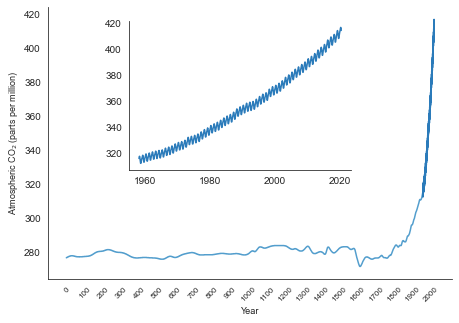

In [3]:
plt.figure(figsize=(7.25, 5))
sns.set_style('white')

pal = sns.color_palette('Blues')
plt.plot(atm_co2_historical_df.timestamp, atm_co2_historical_df.CO2_spline_fit, c=pal[3])

mask = atm_co2_contemporary_df.CO2_fit_ppm > 0
masked_co2_contemp = atm_co2_contemporary_df[mask]
plt.plot(masked_co2_contemp.timestamp, masked_co2_contemp.CO2_fit_ppm, c=pal[4])

xticks = np.arange(0, 2020, 100)
s_per_year = 60*60*24*365
year_zero = atm_co2_historical_df.timestamp[0]
xs = year_zero + (xticks*s_per_year)
plt.xticks(xs, xticks, fontsize=8, rotation=45)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Atmospheric CO$_2$ (parts per million)', fontsize=9)
sns.despine()

ax = plt.gca()
axin1 = ax.inset_axes([0.2, 0.4, 0.55, 0.55])

mask = atm_co2_contemporary_df.CO2_fit_ppm > 0
masked_co2_contemp = atm_co2_contemporary_df[mask]
axin1.plot(masked_co2_contemp.timestamp, masked_co2_contemp.CO2_fit_ppm, c=pal[4])

xticks = np.arange(1960, 2021, 20)
s_per_year = 60*60*24*365
year_zero = datetime(1960, 1, 1).timestamp()
xs = year_zero + (xticks-1960)*s_per_year
axin1.set_xticks(xs)
axin1.set_xticklabels(xticks)
sns.despine(ax=axin1)

plt.savefig('keeling_curve.png', dpi=300)
plt.show()